Adapted from: [UDL Book CM20315_Shallow.ipynb](https://colab.research.google.com/github/udlbook/udlbook/blob/main/CM20315_Shallow.ipynb)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select KernelRestart) and then run all cells (in the menubar, select CellRun All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:



In [1]:
NAME = "Thea Enache"
COLLABORATORS = " "

# Homework 2: Multi Layer Perceptrons

The purpose of this practical is to gain some familiarity with shallow neural networks.  It explores using different numbers of inputs and outputs, hidden units and activation functions.


In [2]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt
#Import files
from google.colab import files
from IPython.display import Image

Let's first construct the shallow neural network with one input, three hidden units, and one output described in section 3.1 of the UDL book.

In [3]:
# Define the Rectified Linear Unit (ReLU) function
# Problem 1: (5 marks)
def ReLU(preactivation):
  activation = preactivation.clip(min=0)
  # clips all vals in preactivation array to be at least 0, vals below 0 set to 0, vals above 0 left alone
  # TODO write code to implement the ReLU and compute the activation at the
  # hidden unit from the preactivation
  # This should work on every element of the ndarray "preactivation" at once
  # One way to do this is with the ndarray "clip" function
  # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.clip.html
  # Another way to do this is with the "np.maximum" function
  # https://numpy.org/doc/stable/reference/generated/numpy.maximum.html
 # YOUR CODE HERE
  activation = preactivation.clip(min=0)
  return activation

<function matplotlib.pyplot.show(close=None, block=None)>

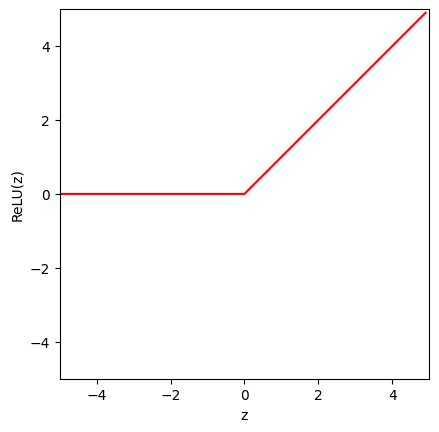

In [4]:
# Make an array of inputs
z = np.arange(-5,5,0.1)
RelU_z = ReLU(z)

# Plot the ReLU function
fig, ax = plt.subplots()
ax.plot(z,RelU_z,'r-')
ax.set_xlim([-5,5]);ax.set_ylim([-5,5])
ax.set_xlabel('z'); ax.set_ylabel('ReLU(z)')
ax.set_aspect('equal')
plt.show

In [5]:
#to establish a connection between your Google Drive account and your Colab notebook.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### We will recreate this plot

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Teaching/CS553-Neural Networks/Lectures/Lecture 10/image1.png',width=500,height=500)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Teaching/CS553-Neural Networks/Lectures/Lecture 10/image1.png'

#### Define a shallow neural network with, one input, one output, and three hidden units
$$\Theta_1 = \begin{bmatrix} \theta_{11} \\ \theta_{21} \\ \theta_{31} \end{bmatrix} $$
$$\Theta_0 = \begin{bmatrix} \theta_{10} \\ \theta_{20} \\ \theta_{30} \end{bmatrix} $$
$$\text{pre} = \Theta_0 + \Theta_1 x$$
$$\text{act} = \text{activation\_function}(\text{pre})$$
$$\Phi = \begin{bmatrix} \phi_{1} \\ \phi_{2} \\ \phi_{3} \end{bmatrix} $$
$$\text{w\_act} = \Phi \odot \text{act}$$
$$ \text{y} = \phi_0 + \Phi^\top \text{act}$$

In [6]:
# Define a shallow neural network with, one input, one output, and three hidden units
# (10 marks)
def shallow_1_1_3(x, activation_fn, phi_0, phi_vec, theta_1, theta_0):
  """
  Inputs:
      x is a batch of scalars. A numpy array with multiple values of size say n.
      activation_fn is numpy function that takes one input and returns one output example, ReLU
      phi_0 is a scalar
      phi_vec is a numpy array of shape (3,)  [phi_1, phi_2, phi_3]
      theta_1 is a numpy array of shape (3,)  [theta_11, theta_21, theta_31]
      theta_0 is a numpy array of shape (3,)  [theta_10, theta_20, theta_30]
  Returns:
      y, pre, act, w_act

      y is the scalar output of the neural network. For input x of size n, the output must be of size n.

      pre stands for for pre-activation values. These are linear functions of x. pre should be a
          numpy array of shape  (n, 3), and each value should be computed from x and theta_1 and theta_0

      act stands for activation values. These archived by applying the activation function
          to the pre.

      w_act stands for with weighted activation. Multiple act with phi_vec element-wise to
          get numpy array of shape (n, 3).
  """
  # TODO Replace the lines below to compute the three initial lines
  # (figure a-c above) from the theta parameters.  These are the preactivations
  pre = theta_0 + x[:, np.newaxis] * theta_1 #shape: (n, 3)
  print(pre.shape)
  # pre must of shape (n, 3) if x is of shape n.
  # Hint: introduce an additional dimension to x to use broadcasting
  # YOUR CODE HERE
  act = activation_fn(pre)
  # Pass these through the ReLU function to compute the activations as in
  # figure 3.3 d-f
  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the y-axis equivalent of figure g-i
  # w_act = ??
  # YOUR CODE HERE
  w_act = phi_vec * act #elementwise *

  # TODO Replace the code below to combing the weighted activations and add
  # phi_0 to create the output as in figure j
  # YOUR CODE HERE
  y = np.sum(w_act, axis = 1) + phi_0

  # Return everything we have calculated
  return y, pre, act, w_act

In [7]:
# Plot the shallow neural network.  We'll assume input in is range [0,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural(x, y, pre, act, w_act, plot_all=True, x_data=[0, 1], y_data=[-1, 1]):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre[:, 0],'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre[:, 1],'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre[:, 2],'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act[:, 0],'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act[:, 1],'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act[:, 2],'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act[:, 0],'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act[:, 1],'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act[:, 2],'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, $x$'); ax.set_ylabel('Output, $y$')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
  plt.show()

Now let's run the neural network.  If your code is correct, then the final output should look like this:
Correct nn output.svg

(100, 3)


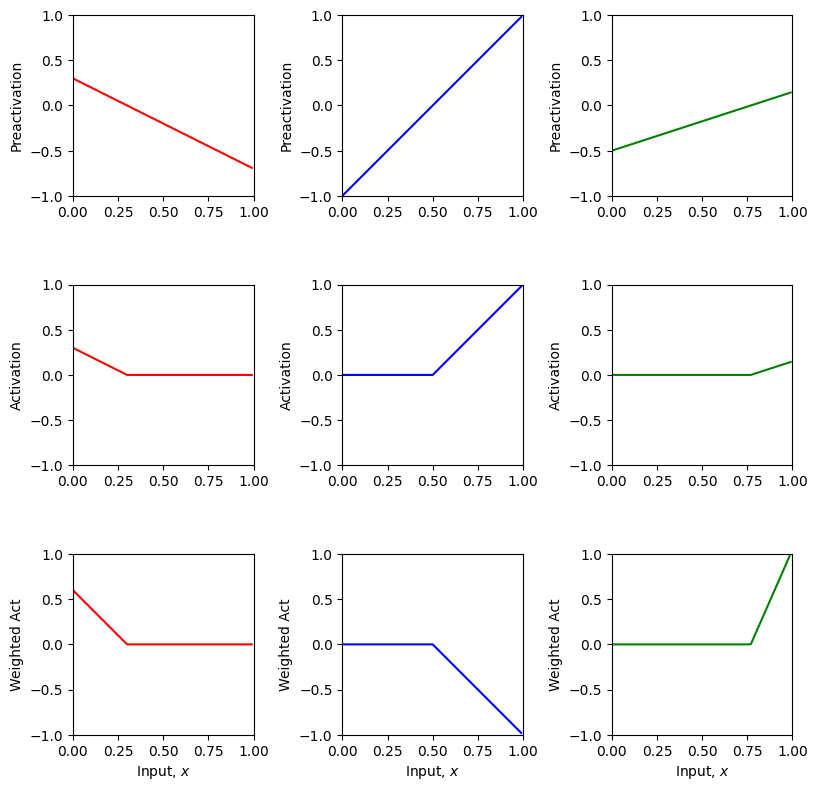

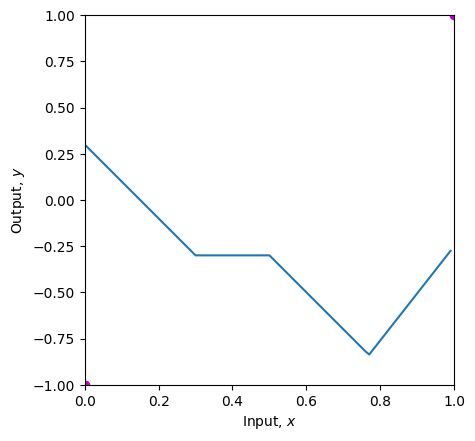

In [8]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

theta_1 = np.array([theta_11, theta_21, theta_31])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_1_1_3(x, ReLU, phi_0, phi_vec, theta_1, theta_0)
# And then plot it
plot_neural(x, y, pre, act, w_act, plot_all=True)

Now let's play with the parameters to make sure we understand how they work.  The original  parameters were:

$\theta_{10} =  0.3$ ; $\theta_{20} = -1.0$<br>
$\theta_{20} =  -1.0$ ; $\theta_{21} = 2.0$<br>
$\theta_{30} =  -0.5$ ; $\theta_{31} = 0.65$<br>
$\phi_0 = -0.3; \phi_1 = 2.0; \phi_2 = -1.0; \phi_3 = 7.0$

#### TODO
#### Problem 3: (2 marks) each total (16 marks)
1. Predict what effect changing phi_0 will have on the network.  
  Increasing this bias term will shift the graph up or down along the y-axis depending on whether you increase or decrease it. In the context of the whole network, phi_0 acts as a bias term directly contributing to the weighted sum of the activations

2. Predict what effect multplying phi_1, phi_2, phi_3 by 0.5 would have.  Check if you are correct
  It would decrease the slopes of the line segments in the output. This is due to the phi values determining the weights applied to the activation, thus scaling the output.

3. Predict what effect multiplying phi_1 by -1 will have.  Check if you are correct.
  It will invert the graph verticallt. phi_1 is the weight applied to the first activation and changing it would reverse the direction of its contribution to the output.

4. Predict what effect setting theta_20 to -1.2 will have.  Check if you are correct.
  theta_20 controls the y value of the second line segment. Changing it to -1.2 will shift said segment downwards.

5. Change the parameters so that there are only two "joints" (including outside the range of the plot)
There are actually three ways to do this. See if you can figure them all out
Method 1: Making the first two segments collinear
Method 2: Making the last two segments collinear
Method 3: Shift theta_10 to be greater than 1.0 so it's outside of the plot range

6. With the original parameters, the second line segment is flat (i.e. has slope zero)
How could you change theta_10 so that all of the segments have non-zero slopes
The second segment is flat because the ReLU activation function sets it to zero -- theta_21 is negative -- To give this segment a non-zero slope, we need to make pre-activation value positive. We can achieve this by increasing theta_10, the point where the first segment ends, so that it is greater than the point where the second segment ends. This effectively swaps the order of the segments, and since theta_22 is positive, the second segment will now have a positive slope.

7. What do you predict would happen if you multiply theta_20 and theta21 by 0.5, and phi_2 by 2.0?
Check if you are correct.
The slope of a segment is determined by the corresponding phi value. Since the second segment is influenced by phi_2, we can achieve a slope of -2 by directly setting phi_2 to -2. With a little more effort, it would also be possible to adjust theta_21 to a value that after being multiplied by the original phi_2 and added to phi_0 results in a slope of -2.

8. What do you predict would happen if you multiply theta_20 and theta21 by -0.5, and phi_2 by -2.0?
Check if you are correct.
Due to the ReLU activation, any segment that was originally negative will remain flat at zero.


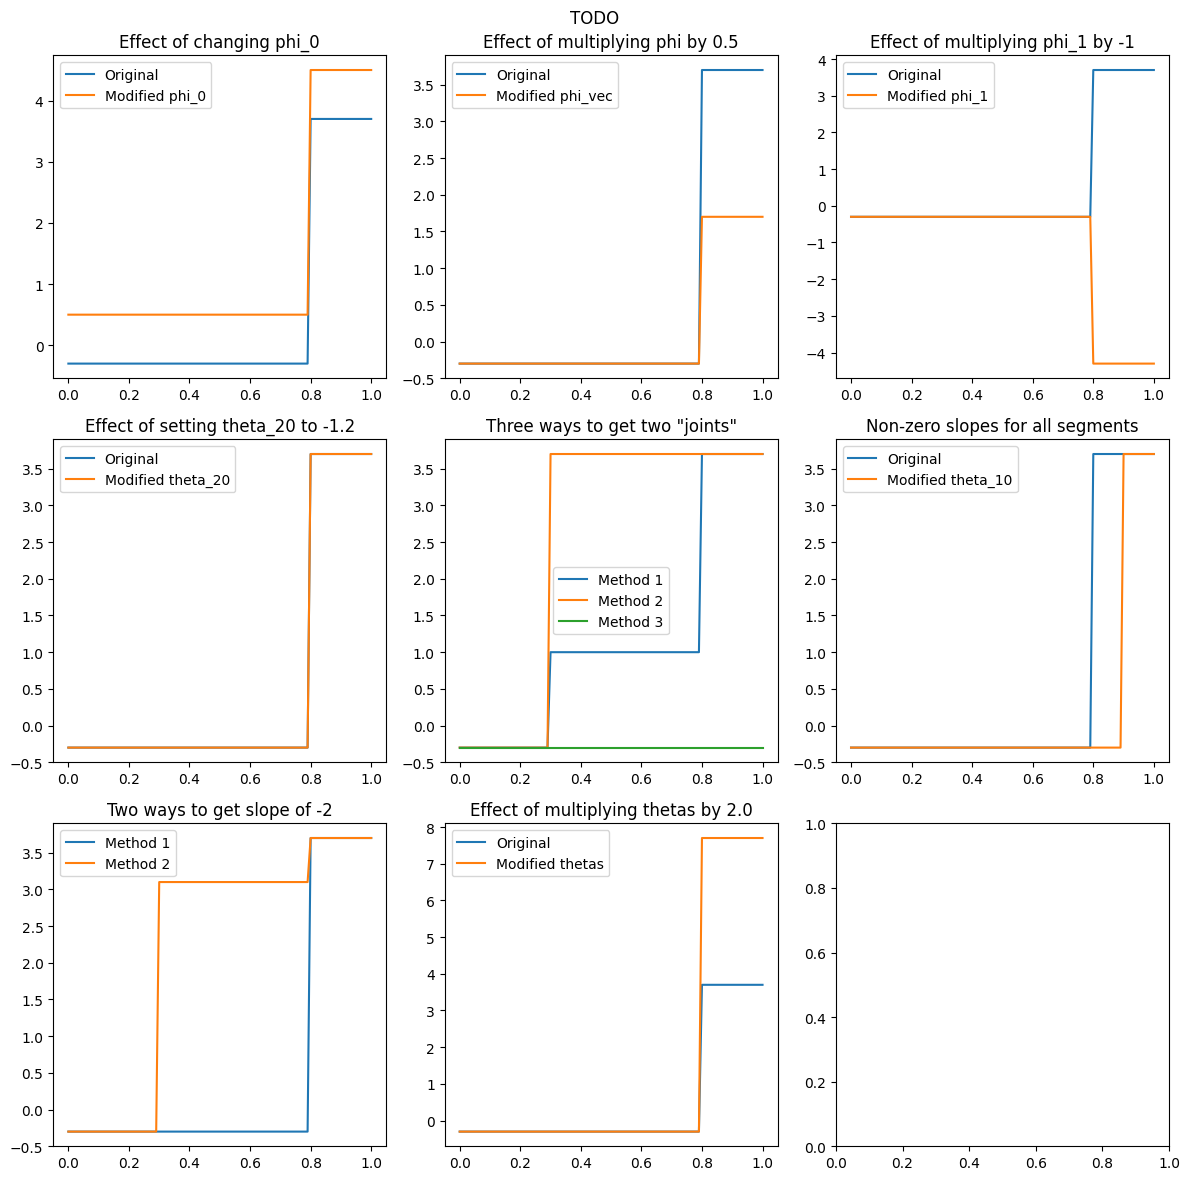

In [9]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

def shallow_113(x, activation, phi_0, phi_vec, theta_1, theta_2):
    """
    x: A numpy array of shape (N, 1)
    activation: A function
    phi_0: A scalar (the bias)
    phi_vec: A numpy array of shape (3, 1)
    theta_1: A numpy array of shape (3, 1)
    theta_2: A numpy array of shape (3, 1)
    """
    pre = np.zeros_like(x)
    act = np.zeros_like(x)
    wact = np.zeros_like(x)

    for i, xi in enumerate(x):
        if xi < theta_1[0]:
            pre[i] = theta_1[1]
        elif xi < theta_2[0]:
            pre[i] = theta_2[1]
        else:
            pre[i] = theta_2[2]

    act = activation(pre)  #applying the activation function
    wact = phi_0 + phi_vec[0] * act  #calculating weighted activation

    return pre, act, wact

#original parameters
theta_1 = np.array([0.3, -1.0, 0.65])
theta_2 = np.array([0.8, -1.0, 2.0])
phi_vec = np.array([2.0, -1.0, 1.0])
phi_0 = -0.3

#define a range of input values
x = np.arange(0, 1.01, 0.01)

#ReLU activation function
relu = lambda x: np.maximum(0, x)

#compute the original output
pre, act, wact = shallow_113(x, relu, phi_0, phi_vec, theta_1, theta_2)

# --- plotting ---
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('TODO')

# --- QUESTIONS AND CODE ---

# 1. Effect of changing phi_0
phi_0_modified = phi_0 + 0.8  # Example: Increased phi_0
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0_modified, phi_vec.copy(), theta_1.copy(), theta_2.copy())
axes[0, 0].plot(x, wact, label='Original')
axes[0, 0].plot(x, wact_mod, label='Modified phi_0')
axes[0, 0].set_title('Effect of changing phi_0')
axes[0, 0].legend()

# 2. Effect of multiplying phi_vec by 0.5
phi_vec_modified = phi_vec * 0.5
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec_modified.copy(), theta_1.copy(), theta_2.copy())
axes[0, 1].plot(x, wact, label='Original')
axes[0, 1].plot(x, wact_mod, label='Modified phi_vec')
axes[0, 1].set_title('Effect of multiplying phi by 0.5')
axes[0, 1].legend()

# 3. Effect of multiplying phi_1 by -1
phi_vec_modified = phi_vec.copy()
phi_vec_modified[0] *= -1
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec_modified, theta_1.copy(), theta_2.copy())
axes[0, 2].plot(x, wact, label='Original')
axes[0, 2].plot(x, wact_mod, label='Modified phi_1')
axes[0, 2].set_title('Effect of multiplying phi_1 by -1')
axes[0, 2].legend()

# 4. Effect of setting theta_20 to -1.2
theta_2_modified = theta_2.copy()
theta_2_modified[1] = -1.2
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec.copy(), theta_1.copy(), theta_2_modified)
axes[1, 0].plot(x, wact, label='Original')
axes[1, 0].plot(x, wact_mod, label='Modified theta_20')
axes[1, 0].set_title('Effect of setting theta_20 to -1.2')
axes[1, 0].legend()

# 5. Two "joints"
theta_2_modified = theta_2.copy()
theta_2_modified[1] = theta_1[2]  #method 1
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec.copy(), theta_1.copy(), theta_2_modified)
axes[1, 1].plot(x, wact_mod, label='Method 1')

theta_2_modified = theta_2.copy()
theta_2_modified[1] = theta_2[2]  #method 2
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec.copy(), theta_1.copy(), theta_2_modified)
axes[1, 1].plot(x, wact_mod, label='Method 2')

theta_1_modified = theta_1.copy()
theta_1_modified[0] = 1.2  #method 3
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec.copy(), theta_1_modified, theta_2.copy())
axes[1, 1].plot(x, wact_mod, label='Method 3')

axes[1, 1].set_title('Three ways to get two "joints"')
axes[1, 1].legend()

# 6. Non-zero slopes for all segments
theta_1_modified = theta_1.copy()
theta_1_modified[0] = 0.9
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec.copy(), theta_1_modified, theta_2.copy())
axes[1, 2].plot(x, wact, label='Original')
axes[1, 2].plot(x, wact_mod, label='Modified theta_10')
axes[1, 2].set_title('Non-zero slopes for all segments')
axes[1, 2].legend()

# 7. Second line segment with slope of -2
phi_vec_modified = phi_vec.copy()
phi_vec_modified[1] = -2  #method 1
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec_modified, theta_1.copy(), theta_2.copy())
axes[2, 0].plot(x, wact_mod, label='Method 1')

target_slope = -2
original_phi_2 = phi_vec[1]
theta_2_modified = theta_2.copy()
theta_2_modified[1] = (target_slope / original_phi_2) - (phi_0 / original_phi_2)  # Method 2
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec.copy(), theta_1.copy(), theta_2_modified)
axes[2, 0].plot(x, wact_mod, label='Method 2')

axes[2, 0].set_title('Two ways to get slope of -2')
axes[2, 0].legend()

# 8. Effect of multiplying thetas by 2.0
theta_1_modified = theta_1.copy()
theta_1_modified[1:] *= 2.0
theta_2_modified = theta_2.copy()
theta_2_modified[1:] *= 2.0
pre_mod, act_mod, wact_mod = shallow_113(x, relu, phi_0, phi_vec.copy(), theta_1_modified, theta_2_modified)

axes[2, 1].plot(x, wact, label='Original')
axes[2, 1].plot(x, wact_mod, label='Modified thetas')
axes[2, 1].set_title('Effect of multiplying thetas by 2.0')
axes[2, 1].legend()

plt.tight_layout()
plt.show()

# Different activation functions

The ReLU isn't the only kind of activation function.  For a long time, people used sigmoid functions.  A logistic sigmoid function is defined by the equation

\begin{equation}
f(h) = \frac{1}{1+\exp{(-10 z )}}
\end{equation}

(Note that the factor of 10 is not standard -- but it allow us to plot on the same axes as the ReLU examples)

In [10]:
# Define the sigmoid function
# (5 marks)
def sigmoid(preactivation):
  # TODO write code to implement the sigmoid function and compute the activation at the
  # hidden unit from the preactivation.  Use the np.exp() function.
  # YOUR CODE HERE
  activation = 1/(1 + np.exp( -10 * preactivation))
  return activation

<function matplotlib.pyplot.show(close=None, block=None)>

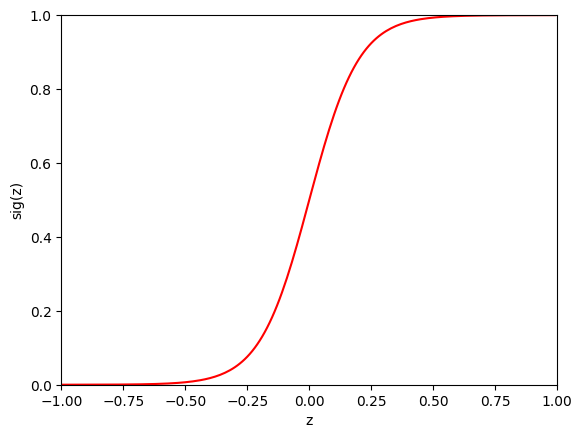

In [11]:
# Make an array of inputs
z = np.arange(-1,1,0.01)
sig_z = sigmoid(z)

# Plot the sigmoid function
fig, ax = plt.subplots()
ax.plot(z,sig_z,'r-')
ax.set_xlim([-1,1]);ax.set_ylim([0,1])
ax.set_xlabel('z'); ax.set_ylabel('sig(z)')
plt.show

Let's see what happens when we use this activation function in a neural network

(100, 3)


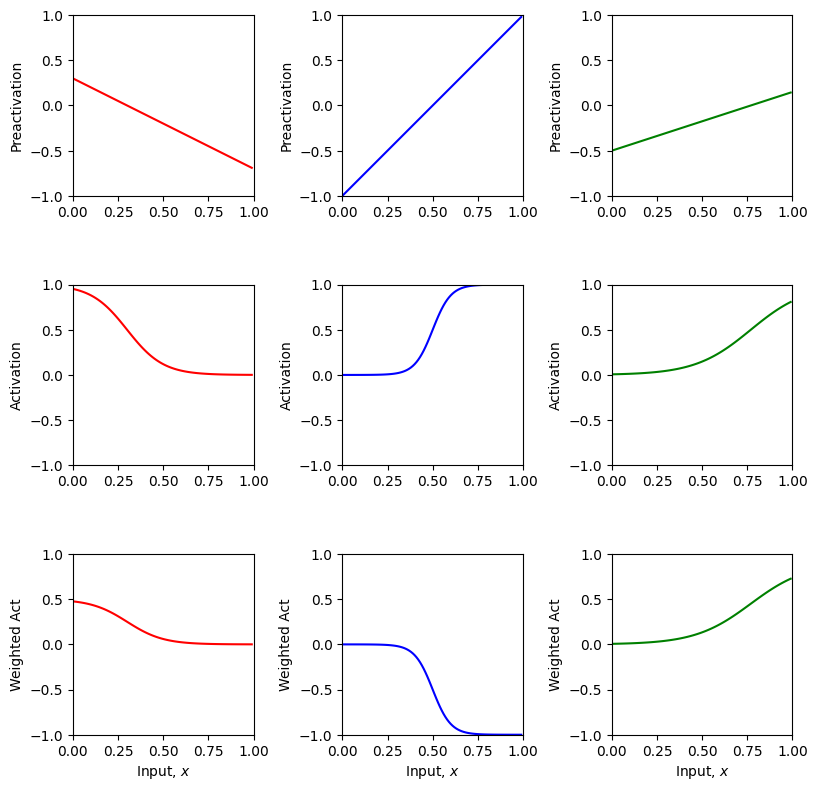

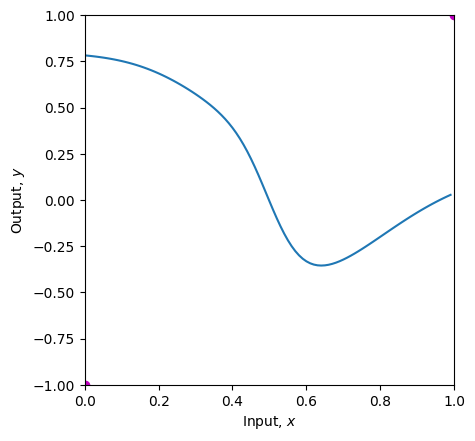

In [12]:
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

theta_1 = np.array([theta_11, theta_21, theta_31])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_1_1_3(x, sigmoid, phi_0,phi_vec, theta_1, theta_0)
# And then plot it
plot_neural(x, y, pre, act, w_act, plot_all=True)

You probably notice that this gives nice smooth curves.  So why don't we use this?  Aha... it's not obvious right now, but we will get to it when we learn to fit models.

# Linear activation functions

However, neural networks don't work if the activation function is linear.  For example, consider what would happen if the activation function was:

\begin{equation}
\mbox{lin}(z) = a + bz
\end{equation}

In [13]:
# Define the linear activation function
def lin(preactivation):
  a =0
  b =1
  # Compute linear function
  activation = a+b * preactivation
  # Return
  return activation

#### TODO
#### Problem 5a: (5 marks)
1. The linear activation function above just returns the input: (0+1*z) = z
Before running the code Make a prediction about what the ten panels of the drawing will look like
Now run the code below to see if you were right. What family of functions can this represent?  

#### Problem 5b: (5 marks)
2. What happens if you change the parameters (a,b) to different values?  
Try a=0.5, b=-0.4 (don't forget) to run the cell again to update the function


(100, 3)


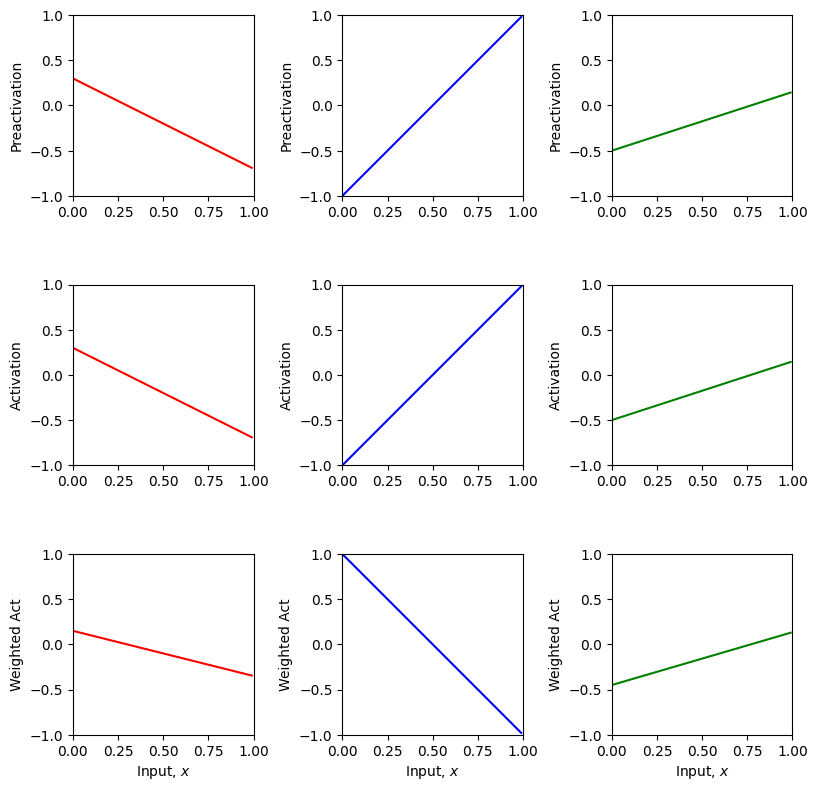

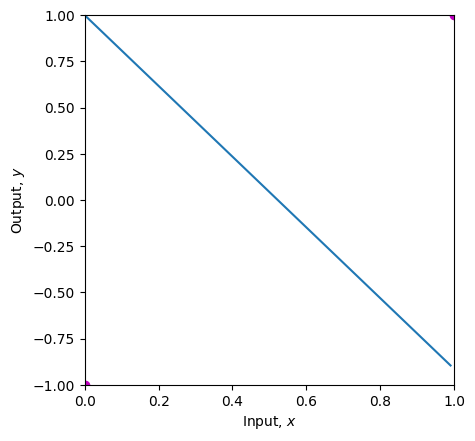

In [14]:


theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = 0.3; phi_1 = 0.5; phi_2 = -1.0; phi_3 = 0.9

theta_1 = np.array([theta_11, theta_21, theta_31])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_1_1_3(x, lin, phi_0,phi_vec, theta_1, theta_0)
# And then plot it
plot_neural(x, y, pre, act, w_act, plot_all=True)

5b: Changing the parameters in the linear activation function shifts and scales the output of the NN. The overall shape remains a single line, but its slope and y-intercept change according to the values of a and b. This is due to the linear activation function simply applying a linear transformation to the preactivation values, and any combination of linear tranformations still results in a linear function.

# Least squares loss

Now let's consider fitting the network to data.  First we need to define the loss function.  We'll use the least squares loss:

\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\mbox{f}[x_{i},\boldsymbol\phi])^2
\end{equation}

where $(x_i,y_i)$ is an input/output training pair and $\mbox{f}[\bullet,\boldsymbol\phi]$ is the neural network with parameters $\boldsymbol\phi$.  The first term in the brackets is the ground truth output and the second term is the prediction of the model

In [15]:
# Least squares function (5 marks)
def least_squares_loss(y_train, y_predict):
  # TODO Replace the line below to use compute the sum of squared
  # differences between the real and predicted values of y
  # you will need to use the function np.sum
  # YOUR CODE HERE
  loss = np.sum((y_train - y_predict)**2)
  return loss

(100, 3)


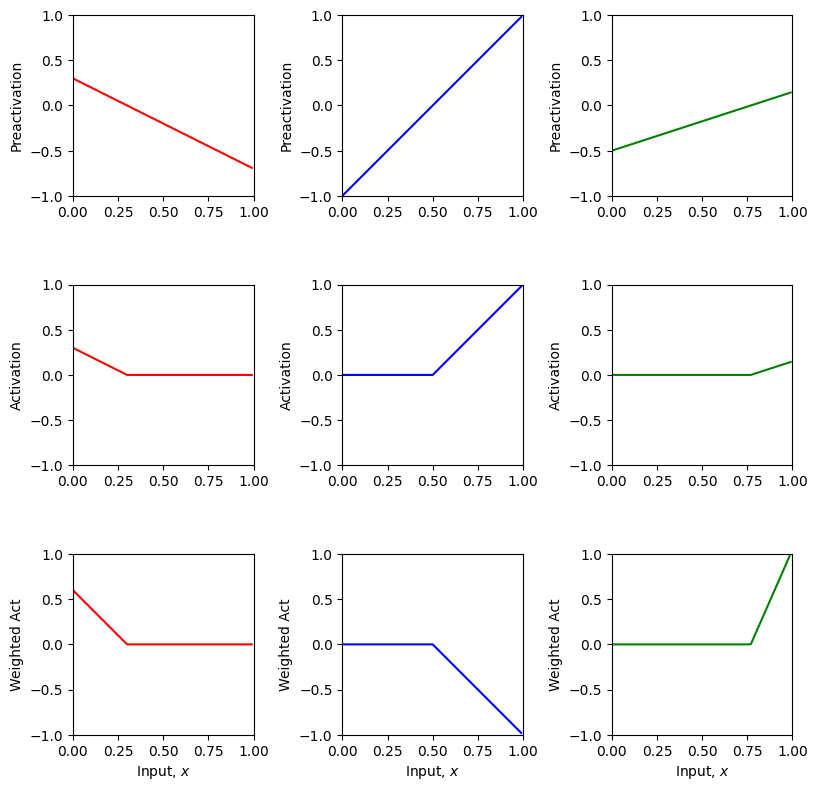

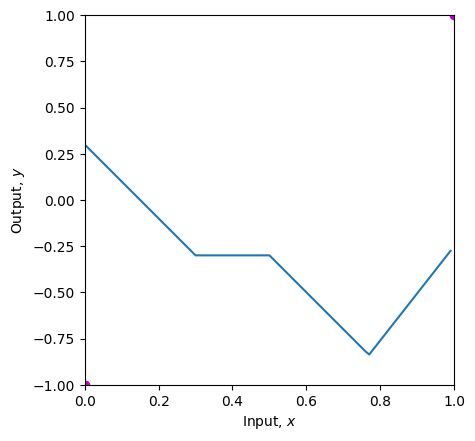

(20, 3)
Loss = 9.385


In [16]:
# Now lets define some parameters, run the neural network, and compute the loss
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

theta_1 = np.array([theta_11, theta_21, theta_31])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_1_1_3(x, ReLU, phi_0,phi_vec, theta_1, theta_0)
# And then plot it
plot_neural(x, y, pre, act, w_act, plot_all=True)

# Run the neural network on the training data
y_predict, *_ = shallow_1_1_3(x_train, ReLU, phi_0,phi_vec, theta_1, theta_0)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print("Loss = %3.3f"%(loss))

# TODO.  Manipulate the parameters (by hand!) to make the function
# fit the data better and try to reduct the loss to as small a number
# as possible.  The best that I could do was 0.181
# Tip... start by manipulating phi_0.
# It's not that easy, so don't spend too much time on this!

# Networks with two inputs

There is a template below to build a neural network that takes two inputs similar to figure below

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/Teaching/CS553-Neural Networks/Lectures/Lecture 10/image2.png',width=500,height=500)

In [17]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y, draw_heatmap=False):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256 ,cmap = 'hot', vmin=-10,vmax=10.0)
    if draw_heatmap:
      fig.colorbar(pos, ax=ax)
    ax.set_xlabel('x1');ax.set_ylabel('x2')
    levels = np.arange(-10,10,1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap='winter')

# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3
def plot_neural_2_inputs(xvec, y, pre, act, w_act, plot_all=False):
  x1 = xvec[..., 0]
  x2 = xvec[..., 1]
  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    draw_2D_function(ax[0,0], x1,x2,pre[..., 0]); ax[0,0].set_title('Preactivation')
    draw_2D_function(ax[0,1], x1,x2,pre[..., 1]); ax[0,1].set_title('Preactivation')
    draw_2D_function(ax[0,2], x1,x2,pre[..., 2]); ax[0,2].set_title('Preactivation')
    draw_2D_function(ax[1,0], x1,x2,act[..., 0]); ax[1,0].set_title('Activation')
    draw_2D_function(ax[1,1], x1,x2,act[..., 1]); ax[1,1].set_title('Activation')
    draw_2D_function(ax[1,2], x1,x2,act[..., 2]); ax[1,2].set_title('Activation')
    draw_2D_function(ax[2,0], x1,x2,w_act[..., 0]); ax[2,0].set_title('Weighted Act')
    draw_2D_function(ax[2,1], x1,x2,w_act[..., 1]); ax[2,1].set_title('Weighted Act')
    draw_2D_function(ax[2,2], x1,x2,w_act[..., 2]); ax[2,2].set_title('Weighted Act')
    plt.show()

  fig, ax = plt.subplots()
  draw_2D_function(ax,x1,x2,y,draw_heatmap=True)
  ax.set_title('Network ouptut, $y$')
  ax.set_aspect(1.0)
  plt.show()

#### Define a shallow neural network with, two inputs, one output, and three hidden units
$\newcommand{\bfx}{\mathbf{x}}$
$$\bfx = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$$
$$\Theta_1 = \begin{bmatrix} \theta_{11} & \theta_{12} \\ \theta_{21} & \theta_{22} \\ \theta_{31} & \theta_{32}\end{bmatrix} $$
$$\Theta_0 = \begin{bmatrix} \theta_{10} \\ \theta_{20} \\ \theta_{30} \end{bmatrix} $$
$$\text{pre} = \Theta_0 + \Theta_1 \bfx$$
$$\text{act} = \text{activation\_function}(\text{pre})$$
$$\Phi = \begin{bmatrix} \phi_{1} \\ \phi_{2} \\ \phi_{3} \end{bmatrix} $$
$$\text{w\_act} = \Phi \odot \text{act}$$
$$ \text{y} = \phi_0 + \Phi^\top \text{act}$$

In [18]:
import numpy as np
# Define a shallow neural network with, two inputs, one output, and three hidden units
# (20 marks)
def shallow_2_1_3(x, activation_fn, phi_0, phi_vec, theta_1, theta_0):
  """
  Inputs:
      x is a (m x n) grid of 2D vectors: a numpy array with shape (m, n, 2)
      activation_fn is numpy function that takes one input and returns one output example, ReLU
      phi_0 is a scalar
      phi_vec is a numpy array of shape (3,)  [phi_1, phi_2, phi_3]
      theta_1 is a numpy array of shape (3,)  [theta_11, theta_21, theta_31]
      theta_0 is a numpy array of shape (3,)  [theta_10, theta_20, theta_30]
  Returns:
      y, pre, act, w_act

      y is the scalar output of the neural network.
          For input x of shape (m, n, 2), the output must be of size (m, n)

      pre stands for for pre-activation values. These are linear functions of x. pre should be a
          numpy array of shape  (m, n, 3), and each value should be computed from x and theta_1 and theta_0

      act stands for activation values. These archived by applying the activation function
          to the pre.

      w_act stands for with weighted activation. Multiple act with phi_vec element-wise to
          get numpy array of shape (m, n, 3).
  """
  # TODO Replace the lines below to compute the three initial linear functions
  # (figure a-c) from the theta parameters.  These are the preactivations
  #   pre = ??
  print("x.shape: ", x.shape, "theta_1.shape: ", theta_1.shape, "theta_0.shape: ", theta_0.shape)
  #reshape for computation
  m,n, _ = x.shape
  x_flat = x.reshape(-1,2) #shape: (m*n, 2)
  # YOUR CODE HERE
  pre_flat = np.dot(x_flat, theta_1.T) + theta_0  #shape: (m*n, 3)
  #reshape pre back to (m, n, 3)
  pre = pre_flat.reshape(m, n, 3)
  print("pre.shape: ", pre.shape)

  # Pass these through the ReLU function to compute the activations as in
  # figure d-f
  act = activation_fn(pre)

  # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
  # To create the equivalent of figure g-i
  # w_act = ??
  # YOUR CODE HERE
  print("phi_vec.shape: ", phi_vec.shape)
  w_act = act * phi_vec  #broadcasting over the last dimension
  print("w_act.shape: ", w_act.shape)

  # TODO Replace the code below to combing the weighted activations and add
  # phi_0 to create the output as in figure j
  # y = ?
  # YOUR CODE HERE
  y = phi_0 + np.sum(w_act, axis=2)
  print("y.shape: ", y.shape)

  # Return everything we have calculated
  return y, pre, act, w_act


x.shape:  (101, 101, 2) theta_1.shape:  (3, 2) theta_0.shape:  (3,)
pre.shape:  (101, 101, 3)
phi_vec.shape:  (3,)
w_act.shape:  (101, 101, 3)
y.shape:  (101, 101)


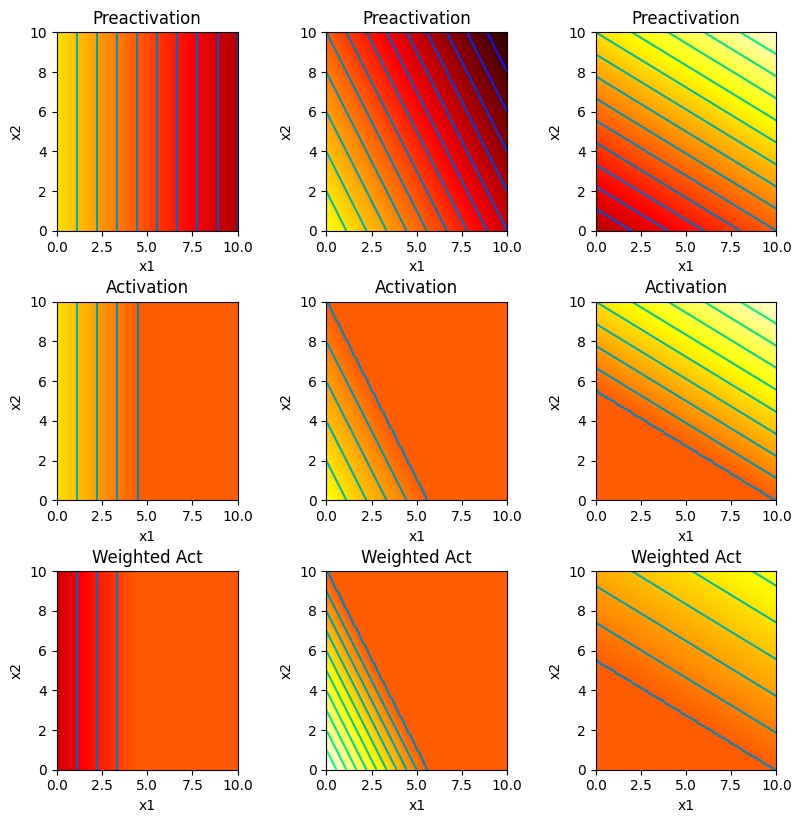

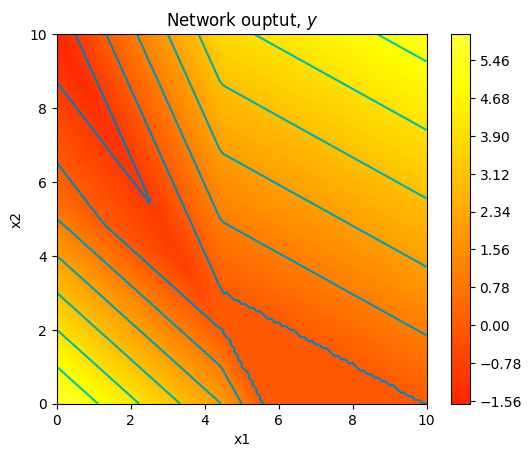

In [19]:
# Now lets define some parameters and run the neural network
theta_10 =  4.0 ;  theta_11 = -0.9; theta_12 = 0.0
theta_20 =  5.0  ; theta_21 = -0.9 ; theta_22 = -0.5
theta_30 =  -5  ; theta_31 = 0.5; theta_32 = 0.9
phi_0 = 0.0; phi_1 = -1.0; phi_2 = 2.0; phi_3 = 0.6


theta_1 = np.array([[theta_11, theta_12],
                    [theta_21, theta_22],
                    [theta_31, theta_32]])
theta_0 = np.array([theta_10, theta_20, theta_30])
phi_vec = np.array([phi_1, phi_2, phi_3])

# https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html
x1,x2 = np.mgrid[0:10:101j,
                 0:10:101j]
xvec = np.stack((x1, x2), axis=-1)

# We run the neural network for each of these input values
y, pre, act, w_act = \
    shallow_2_1_3(xvec, ReLU, phi_0, phi_vec, theta_1, theta_0)
# And then plot it
plot_neural_2_inputs(xvec, y, pre, act, w_act, plot_all=True)



The above plots should look like regions of space divided by lines